# Constructing a graph for assessing the changes in a network when it is attacked

Nodes of graph: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Edges of graph: 
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), 

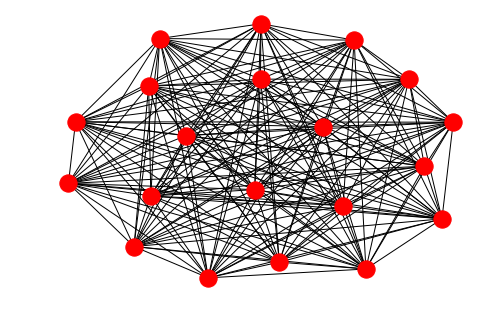

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G=nx.complete_graph(20)
 
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())
nx.draw(G)

print("Initial degree centralities of a fully connected graph:",nx.degree_centrality(G))
print("Initial betweenness centralities of a fully connected graph:",nx.betweenness_centrality(G))
print("Initial closeness centralities of a fully connected graph:",nx.closeness_centrality(G))
print("Initial diameter of a fully connected graph:",nx.diameter(G))
print("The clustering coefficients for node 0:",nx.clustering(G,0))

# Performing attacks and analysing the changes across the network

The degree centralities after modifying edges: {0: 1.0, 1: 0.42857142857142855, 2: 0.8571428571428571, 3: 0.8571428571428571, 5: 0.7857142857142857, 6: 0.8571428571428571, 7: 0.9285714285714285, 9: 0.9285714285714285, 10: 0.9285714285714285, 11: 0.9285714285714285, 12: 0.8571428571428571, 13: 1.0, 15: 0.9285714285714285, 18: 1.0, 19: 1.0}
The clustering coefficients for node 0 after modifying edges: 0.9333333333333333
The diameter of the network after modifying edges: 2


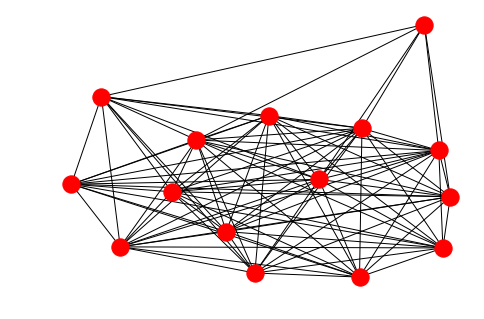

In [26]:
ebunch=[(1,2),(1,3),(1,4),(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),(1,12),(2,3),(5,6),(15,14),(13,4),(12,5),(15,5)]
G.remove_edges_from(ebunch)

ListOfNodes=[16,17,18,7,8,14,3,4,7]
sample=5
RandomSample = random.sample(ListOfNodes,sample)
G.remove_nodes_from(RandomSample)

nx.draw(G)

print("The degree centralities after modifying edges:",nx.degree_centrality(G))
print("The clustering coefficients for node 0 after modifying edges:",nx.clustering(G,1))
print("The diameter of the network after modifying edges:",nx.diameter(G))

# Performing the above steps on a real network as prepared in Assignment 1

Total Airport Imported :  7345 # of Errors :  353
Total Routes Imported :  66765 # of Errors :  898
344  -   Cologne Bonn Airport
342  -   Hamburg Airport
350  -   Stuttgart Airport
351  -   Berlin-Tegel Airport
2997  -   Chhatrapati Shivaji International Airport
3093  -   Indira Gandhi International Airport
3941  -   Eleftherios Venizelos International Airport
532  -   Aberdeen Dyce Airport
248  -   Kotoka International Airport
1230  -   Málaga Airport
580  -   Amsterdam Airport Schiphol
737  -   Stockholm-Arlanda Airport
3682  -   Hartsfield Jackson Atlanta International Airport
2179  -   Abu Dhabi International Airport
3673  -   Austin Bergstrom International Airport
2057  -   Bahrain International Airport
1218  -   Barcelona International Airport
636  -   Bergen Airport Flesland
467  -   George Best Belfast City Airport
1538  -   Bologna Guglielmo Marconi Airport
3131  -   Kempegowda International Airport
3448  -   General Edward Lawrence Logan International Airport
302  -   Brusse

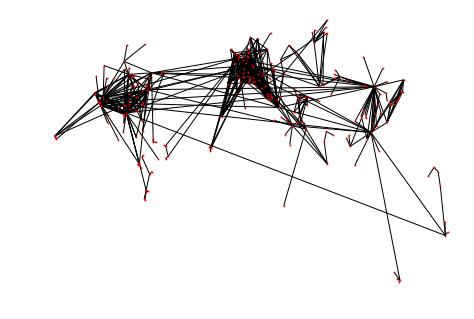

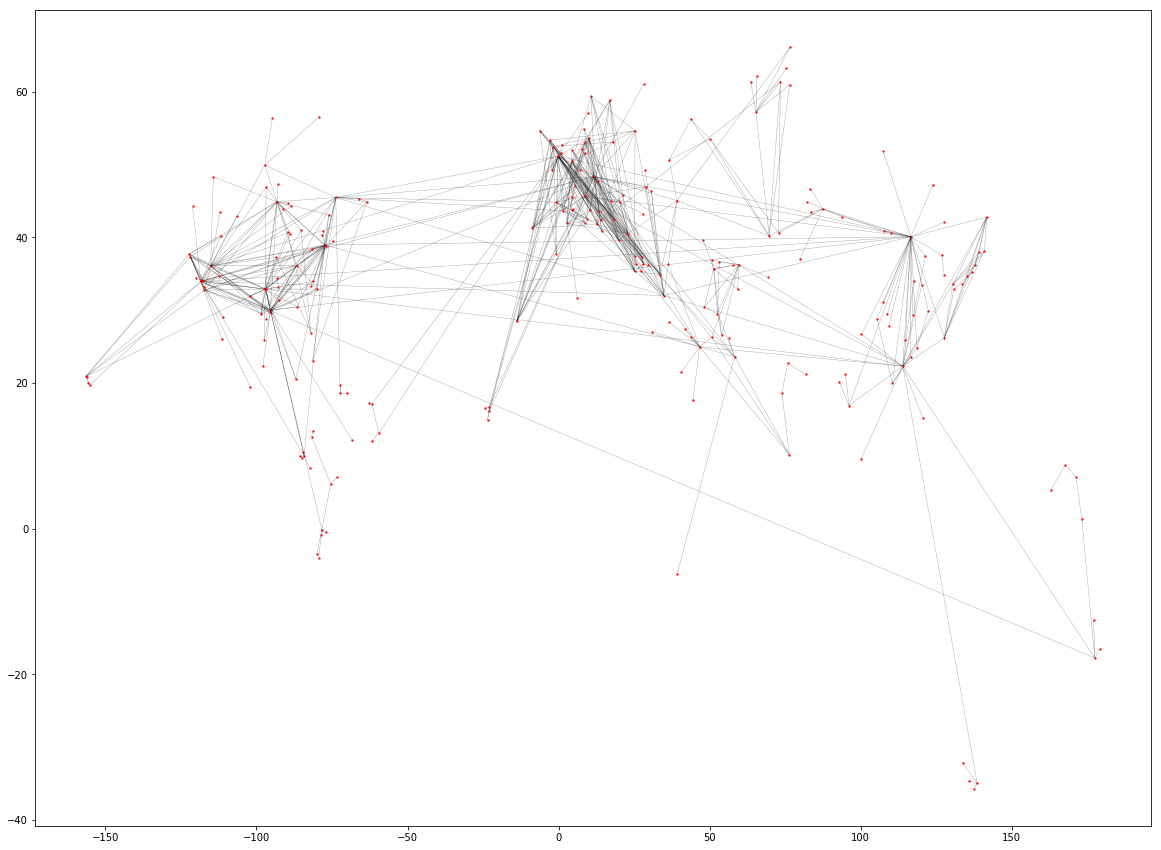

In [28]:
import urllib.request

url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
response = urllib.request.urlopen(url)
data = response.read()
file = open("airports_db.dat", "wb")
file.write(data)
file.close()
import csv

f = open("airports_db.dat", encoding = "utf8")
airport_db = [] 
errors = 0
for airport in csv.reader(f, delimiter = ','):
    current_record = []
    try:
        current_record.append(int(airport[0])) 
        current_record.append(airport[1]) 
        current_record.append(airport[2])
        current_record.append(airport[3])
        current_record.append(airport[4])
        current_record.append(airport[5])
        current_record.append(float(airport[6]))
        current_record.append(float(airport[7]))
        current_record.append(float(airport[8]))
        current_record.append(float(airport[9]))
        current_record.append(airport[10])
        current_record.append(airport[11])
        current_record.append(airport[12])
        current_record.append(airport[13])
    except : 
        errors += 1
    else:
        airport_db.append(current_record)
print("Total Airport Imported : ", len(airport_db), "# of Errors : ", errors)

url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
response= ""
data = ""
response = urllib.request.urlopen(url)
data = response.read()

file = open("routes_db.dat", "wb")
file.write(data)
file.close()

f = open("routes_db.dat", encoding = "utf8")
route_db = []
errors = 0
for route in csv.reader(f, delimiter = ','):
    current_record = []
    try:
        current_record.append(route[0]) 
        current_record.append(int(route[1]))
        current_record.append(int(route[3]))
        current_record.append(int(route[5]))
        current_record.append(int(route[7]))
        current_record.append(route[8])
  
    except : 
        errors += 1
    else:
        route_db.append(current_record)
print("Total Routes Imported : ", len(route_db), "# of Errors : ", errors)

import networkx as nx
network = nx.Graph()
for airport in airport_db:
    network.add_node(airport[0], id=airport[0], name=airport[1], city=airport[2], country=airport[3], iata=airport[4], 
                     icao=airport[5],
                     lat=airport[6], 
                     long=airport[7], alt=airport[8], offset=airport[9], 
                     daylight=airport[10], timezone=airport[11], type=airport[12], source=airport[13])
for route in route_db:
    if route[2] in network.nodes() and route[3] in network.nodes:
        network.add_edge(route[2], route[3], airline = route[0], airline_id = route[1], stops = route[4], equipment = route[5])
        
network.nodes[507]
for i in list(network.neighbors(507)):
    print(network.nodes[i]['id'], " -  ", network.nodes[i]["name"])


sample=6000
rem=[row[0] for row in airport_db]
RandomSample = random.sample(rem,sample)
network.remove_nodes_from(RandomSample)

degree_centrality = nx.degree_centrality(network)
for airport, centrality_value in degree_centrality.items():
    network.nodes[airport]['degree_centrality'] = centrality_value
    
for airport, degree in list(network.degree()):
    if degree == 0:
        network.remove_node(airport)

[len(e) for e in nx.connected_components(network)]

main_subgraph = max(nx.connected_components(network), key= len)
network_main = network.subgraph(main_subgraph)
nx.info(network_main)


import matplotlib.pyplot as plt
for airport in network_main.nodes():
    network_main.node[airport]['coordinates'] = (network_main.node[airport]['long'],
                                                 network_main.node[airport]['lat'] )
nx.draw(network_main, nx.get_node_attributes(network_main, 'coordinates'), node_shape = '.' , node_size= 3 )
plt.show()


plt.figure(figsize = (20, 15))
nx.draw_networkx_nodes(network_main, nx.get_node_attributes(network_main, 'coordinates'), node_shape = '.' , node_size = 6)
nx.draw_networkx_edges(network_main, nx.get_node_attributes(network_main, 'coordinates'), width = 0.3 , alpha = 0.5)
plt.show()
